#**Group 4330**

##**Step1**

First we will start to define and answer on Put - Call Parity in the context of binomial trees model.

**(1)** Indeed, the principle of put-call parity is applicable to European options. Within the framework of the binomial tree model, the validity of put-call parity is upheld. This is because the model is built on the premise of no arbitrage and perfectly fluid markets. The formaula representing put-call parity for European options is:

  C - P = $S_0$ - K$e^{-rT}$

  where:

  C is the price of European call option.

  P is the price of the European put option.

  $S_0$ is the current price of the underlying asset.

  K is the strike price.

  r is the risk-free interest rate and

  T is the time to expiration.

  This relationship is derived under the assumption that the options are European, meaning they can only be exercised at expiration. The binomial tree model respects this relationship as it prices options at each node base on the possible up and down movements of the underlying asset, and the no-arbitrage principle ensures that put-call parity is maintained. In market efficiency theory, market prices do not have opportunity for riskless profit, or arbitrages except transaction costs. Under no arbitrage, identical assets trade at the same time should have the same price at different places.

**(2)** Here we will rewrite the put-call parity equation to solve for the call price(C) in terms of everything else, we can arrange the standard put-call equation for European options as follow:

C = P + $S_0$ - K$e^{-rT}$

Here, the price of the European call option (C) can be expressed in terms of the price of the European put option (P), the current price of the underlying asset ($S_0$), the strike price (K), the risk-free interest rate (r) and the time to expiration (T).

**(3)** Next, we will rewrite the put-call parity equation to solve for the put price (P) in terms of everything else, we can rearrange the standard put-call parity equation for European optons as follow:

P = C - $S_0$ + K$e^{-rT}$

So, the price of the European put option (P), can be expressed in terms of the price of the European call option (C), the current price of the underlying asset ($S_0$), the strike price (K), the risk-free interest rate (r), and the time to expiration (T).

**(4)** Put-call parity **DOES NOT** directly apply for American options. This is because American options allow early exercise before maturity.

So,there can be an early exercise premium that affects the put and call prices.

Specifically, American call options are rarely exercised early but American put options may be exercised if the stock price falls below the strke price.

This means that put option can take on additional value from the early exercise feature, violating the put-call parity relationship.

So, while the put-call parity gives a boundary condition for American option prices, the early exercise premium means the pricing relationship does not directly hold.

In [ ]:
#Import necessary libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

## Saw Sha Plaw Law .

**(5)** Here we will work on European calls and puts using a binomial tree. We are given that $S_0$ = 100, r = 5%, $\sigma$ = 20%, T = 3 months.

For ATM options, the strike price K is equal to the initial stock price $S_0$, which is 100.

For this European call and put options, we will use N = 50 steps, which is a common choice for short-term options(3 months in this case) and provides a good balance between accuracy and computational efficiency. Moreover, as the number of steps increases, the binomial model tends to converge towards the Black-Scholes model, 50 steps are generally enough to get close to this convergence.

A brief discussion for overall process as follow:

(a) We will construct a binomial tree for the underlying stock price. The tree is built using upward and downward movement factors(u and d), which are derived from volatility ($\sigma$).

(b) For each final node in the tree, we calculate the payoff of the call and put options. For a call, it is max(S - K, 0) and for a put, max(K - S, 0).

(c) Starting from the final nodes, we calculate the option value at each preceding node base on risk-neutral probabilities. This is done until the initial node is reached.

(d) We calculate the Delta at each node, representing the sensitivity of the option price to small changes in the underlying asset's price.

Next, we will write a function to compute the European Call and Put options. The following codes will do exactly that.





In [ ]:
#here we will define function for european call option

def call_option_price_delta(S_ini, K, T, r, sigma, N):
  dt = T/N #here we define time stamp
  u = np.exp(sigma * np.sqrt(dt)) #here we define upward factor
  d = np.exp(-sigma * np.sqrt(dt)) #here we define downward factor
  p = (np.exp(r * dt) - d) / (u -d) #here we define riks-neutral probabilities
  C = np.zeros([N + 1, N + 1]) #here we initialize array for call option prices
  S = np.zeros([N+1, N+1]) #here we initialize array for underlying stock prices
  Delta = np.zeros([N,N]) #here we initialize array for Delta

  #here we calculate the call option values and stock prices at maturity

  for i in range (0, N+1):
    C[N,i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
    S[N,i] = S_ini * (u ** i) * (d ** (N - 1))

  #here we perfrom backward induction to calculate option values at each node

  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      C[j,i] = np.exp(-r * dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
      S[j,i] = S_ini * ( u ** i) * (d ** (j - i))
      Delta[j,i] = (C[j+1, i+1] - C[j+1, i]) / (S[j+1, i + 1] - S[j+1, i])

  return C[0,0], C, S, Delta

#Given parameters

S_0 = 100 #initial stock price
r = 0.05 #risk free rate
sigma = 0.20 #volatility
T = 3 / 12 #Time to maturity in years (3 months)
K = S_0 #ATM options, so strike price equals initial stock price
N = 50 # Number of steps in the binomial tree

#calculate the European call option prie and Delta

european_call_price, _, _, european_call_delta = call_option_price_delta(S_0, K, T, r, sigma, N)



In [ ]:
#next we will calculate European put option

def put_option_price_delta(S_ini, K, T, r, sigma, N):
  dt = T/N #here we define time stamp
  u = np.exp(sigma * np.sqrt(dt)) #here we define upward factor
  d = np.exp(-sigma * np.sqrt(dt)) #here we define downward factor
  p = (np.exp(r * dt) - d) / (u -d) #here we define riks-neutral probabilities
  P = np.zeros([N + 1, N + 1]) #here we initialize array for put option prices
  S = np.zeros([N+1, N+1]) #here we initialize array for underlying stock prices
  Delta = np.zeros([N,N]) #here we initialize array for Delta

  #calculate put option values and stock prices at maturity

  for i in range(0, N + 1):
    S[N,i] = S_ini * (u ** i) * (d ** (N - i))
    P[N,i] = max(K - S[N,i], 0)

  #backward induction to calculate option values at each node

  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      P[j,i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
      S[j,i] = S_ini * (u ** i) * (d ** (j - i))
      Delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

  return P[0, 0], P, S , Delta

#here we will calculate European put option price and Delta

european_put_price, _, _, european_put_delta = put_option_price_delta(S_0, K, T, r, sigma, N)



In the following codes, we will try to check put-call parity.

In [ ]:
#here we will round European option prices to nearest cent

european_call_price_rounded = round(european_call_price, 2)
european_put_price_rounded = round(european_put_price, 2)

#here we will check put-call parity : C - P = S_0 - Ke^(-rT)

european_put_call_parity_right_hand_side = S_0 - K * np.exp(-r * T)
european_put_call_parity_right_hand_side_rounded = round(european_put_call_parity_right_hand_side, 2)

print("European Call Option Price : ", european_call_price_rounded)
print("European Put Option Price : ", european_put_price_rounded)
print("European Put-Call parity at time = 0 : ", round(european_call_price - european_put_price,2))
print("Right Hand Side of put-call parity :", european_put_call_parity_right_hand_side_rounded)


European Call Option Price :  4.6
European Put Option Price :  3.35
European Put-Call parity at time = 0 :  1.24
Right Hand Side of put-call parity : 1.24


The calculated price for the ATM European options using a binomial tree with 50 steps are



*   European Call Option Price = 4.60
*   European Put Option Price = 3.35

The right hand side of the put-call parity equation is 1.24 which matches the difference between the call and put prices 1.24 within sensible rounding. Thus, the calculated option prices satisfy the put-call parity , validating the correctness of our calculations. These results confirm that the binomial tree method with 50 steps provides reliable estimates for the prices of ATM European call and put options with the given parameters.





**(6)** Here we will calculate Greek-Delta for the European call and European put at time 0.

In [ ]:
#here we will retrieve Greek-Delta for European Call and Put at time 0

european_delta_call_at_time_0 = european_call_delta[0,0]
european_delta_put_at_time_0 = european_put_delta[0,0]

print("Greek-Delta for European Call at time 0 : ", european_delta_call_at_time_0 )
print("Greek-Delta for European Put at time 0 : ", european_delta_put_at_time_0)


Greek-Delta for European Call at time 0 :  0.56911969908816
Greek-Delta for European Put at time 0 :  -0.4308803009118424


The delta of the European Call Option is positive, while the Delta of the European Put Option is negative. This is consistent with the general behaviour of thes options with respect to underlying asset's price movements.

The magnitudes of Delta for both the European put and call options are relatively close, but not identical. This is typical for at-the-money ATM options where the strike price is equal to the current price of the underlying asset.

Delta primarily act as a proxy for the sensitivity of the option's price to small movements in the underlying asset's price. It essentially indicates how much the price of an option is expected to change for a $1 change in the price of the underlying asset.

The positive Delta for the European call option indicates that its value is expected to increase as the underlying asset's price increases. This aligns with the nature of a call option, which provides the right to buy underlying asset. Hence, when the asset's price goes up, the option becomes more valuable.

The negative Delta for the European put option indicates that its value is expected to increase as the underlying asset's price decreases. This is consistent with the nature of a put option, which provides the right to sell the underlying asset. Therefore, when the asset's price falls, the option gains value.

The signs of Delta for oth options are in line with their respective paoff structures. A call option benefits from upward movements in the underlying asset, while a put option benefits from downward movements . This fundamental difference is reflected in the positive Delta for European calls and negative Delta European puts.









**(7)** Here we will compute the European call and put options price to 5% increase in volatility (from 20% to 25 %) and verify the prices change with respect to the change in volatility.

In [ ]:
#here we recalculate the European call and put option prices with the increased volatility


sigma_new = 0.25 #volatility

european_call_price_new, _, _, _, = call_option_price_delta(S_0, K, T, r, sigma_new, N)
european_put_price_new, _, _, _, = put_option_price_delta(S_0, K, T, r, sigma_new, N)

#here we calculate sensitivity to the change in volatility (Vega)

european_vega_call = european_call_price_new - european_call_price
european_vega_put = european_put_price_new - european_put_price

print("European Call Price New : ", round(european_call_price_new, 2))
print("European Put Price New : ", round(european_put_price_new, 2))
print("European Put Vega : ", round(european_vega_put, 2))
print("European Call Vega : ", round(european_vega_call, 2))

European Call Price New :  5.57
European Put Price New :  4.33
European Put Vega :  0.98
European Call Vega :  0.98


European Call Option



*   New price with 25% volatility : 5.57
*   Increase in Price (Vega for European Call) : 0.98

European Put Option


*   New price with 25% volatility : 4.33
*   Increase in Price(Vega for European Put) : 0.98

Both the European call and put option prices increased with the rise in volatility. The increase was approximately 0.98 for both options. This indicates that both call and put options become more valuable as the uncertainty or volatility in the underlying asset increases.

Vega, the sensitivity of option prices to volatility, is always positive for both call and put options. This is because increased volatility leads to greater uncertainty and a higher chance of the option ending in-the-money, which in turn increases the option's value.

The impact of the increase in volatility was similar for both the call and put options. This is often the case for at-the-money options. Both types of options benefit from increased volatility because it increases the probability of significant price movemeents, either up or down, which can be advantages for option holders.

But note that while the numerical impact was similar, the context differs. For the call option, higher volatility increases the potential for upside movements, making the right to buy more valuable. For the put option, higher volatility amplifies the potential for downside movements, making the right to sell more valuable.



## Huynh Truong Huu

In [ ]:
def option_pricing_binary_tree(
        S0=100, K=100, sigma=0.2, T=3/12, N=50, r=0.05, opttype='C', opt='American'
):
    dt = T/N # define dt
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    S = np.zeros([N+1,N+1])
    C = np.zeros([N+1,N+1])
    delta = np.zeros([N,N])
    p = (np.exp(r*dt)-d)/(u-d)

    if opt=='European':
        for i in range(N+1):
            S[N,i] = S0*(u**i)*(d**(N-i))
            if opttype=='C':
                C[N,i] = max(S[N,i]-K,0)
            elif opttype=='P':
                C[N,i] = max(K-S[N,i],0)
        for j in range(N-1, -1, -1):
            for i in range(j+1):
                S[j,i] = S0*(u**i)*(d**(j-i))
                C[j,i] = np.exp(-r*dt)*(p*C[j+1,i+1] + (1-p)*C[j+1,i])
                delta[j,i] = (C[j+1,i+1]-C[j+1,i])/(S[j+1,i+1]-S[j+1,i])

    elif opt=='American':
        for i in range(N+1):
            S[N,i] = S0*(u**i)*(d**(N-i))
            if opttype=='C':
                C[N,i] = max(S[N,i]-K,0)
            elif opttype=='P':
                C[N,i] = max(K-S[N,i],0)
        for j in range(N-1, -1, -1):
            for i in range(j+1):
                S[j,i] = S0*(u**i)*(d**(j-i))
                C[j,i] = np.exp(-r*dt)*(p*C[j+1,i+1] + (1-p)*C[j+1,i])
                if opttype=='C':
                    C[j,i] = max(S[j,i]-K,C[j,i])
                elif opttype=='P':
                    C[j,i] = max(K-S[j,i],C[j,i])
                delta[j,i] = (C[j+1,i+1]-C[j+1,i])/(S[j+1,i+1]-S[j+1,i])


    return C, S, delta

**(8)** Now let's work on American calls and puts using a binomial tree.

* For ATM options, $S_0=100$

* For this American call and put options, we will use N = 50 steps, to fit with 3months period and to help us easily compare with European options. One special feature of American options are that they could execute any time before expiration.

* A brief discussion for overall process as follow:

  (1) We will construct a binomial tree for the underlying stock price. The tree is built using upward and downward movement factors(u and d), which are derived from volatility ($\sigma$).  
  (2) For each final node in the tree, we calculate the payoff of the call and put options. For a call, it is max(S - K, 0) and for a put, max(K - S, 0).  
  (3) Starting from the final nodes, we calculate the option value at each preceding node base on risk-neutral probabilities. This is done until the initial node is reached.  
  However, with American option we need one more step is that compare the option price with the difference between stock price at that node and strike price to select the bigger one.  
  (4) We calculate the Delta at each node, representing the sensitivity of the option price to small changes in the underlying asset's price.

**(9)**  At time 0,
a. The delta is computed by the change of option price of the next step per the change of underlying asset price of the next step.

b. Getting the same with European option, the delta of the American Call Option is positive, while the Delta of the American Put Option is negative. This is consistent with the general behaviour of these options with respect to underlying asset's price movements.

**(10)**  
a. Let's compute the price of options at $σ=20\%$ and $σ=25\%$.  

In [ ]:
# Call price at sigma = 0.2
C20, _, _ = option_pricing_binary_tree(
        S0=100, K=100, sigma=0.2, T=3/12, N=50, r=0.05, opttype='C', opt='American'
)
# Call price at sigma = 0.25
C25, _, _ = option_pricing_binary_tree(
        S0=100, K=100, sigma=0.25, T=3/12, N=50, r=0.05, opttype='C', opt='American'
)

In [ ]:
print(
    f"""
    The call price at t=0 with sigma equal to 20% is ${C20[0,0]:.2f} and equal to 25% is ${C25[0,0]:.2f}.
    So the sensitive is ~${(C25[0,0]-C20[0,0])/(25-20):.2f} for 1% volatility
    """
)


    The call price at t=0 with sigma equal to 20% is $4.60 and equal to 25% is $5.57.
    So the sensitive is ~$0.20 for 1% volatility
    


In [ ]:
# Put price at sigma = 0.2
P20, _, _ = option_pricing_binary_tree(
        S0=100, K=100, sigma=0.2, T=3/12, N=50, r=0.05, opttype='P', opt='American'
)
# Put price at sigma = 0.25
P25, _, _ = option_pricing_binary_tree(
        S0=100, K=100, sigma=0.25, T=3/12, N=50, r=0.05, opttype='P', opt='American'
)

In [ ]:
print(
    f"""
    The put price at t=0 with sigma equal to 20% is ${P20[0,0]:.2f} and equal to 25% is ${P25[0,0]:.2f}.
    So the sensitive is ~${(P25[0,0]-P20[0,0])/(25-20):.2f} for 1% volatility
    """
)


    The put price at t=0 with sigma equal to 20% is $3.47 and equal to 25% is $4.45.
    So the sensitive is ~$0.20 for 1% volatility
    


## Hao Pham

**(11)** European call and put satisfy put-call parity

In [ ]:
#here we will round European option prices to nearest cent

european_call_price_rounded = round(european_call_price, 2)
european_put_price_rounded = round(european_put_price, 2)

#here we will check put-call parity : C - P = S_0 - Ke^(-rT)

european_put_call_parity_right_hand_side = S_0 - K * np.exp(-r * T)
european_put_call_parity_right_hand_side_rounded = round(european_put_call_parity_right_hand_side, 2)

print("ATM European Call Price : ", european_call_price_rounded)
print("ATM European Put Price : ", european_put_price_rounded)
print("European Put-Call parity at time = 0 : ", round(european_call_price - european_put_price,2))
print("Right Hand Side of put-call parity :", european_put_call_parity_right_hand_side_rounded)

ATM European Call Price :  4.6
ATM European Put Price :  3.35
European Put-Call parity at time = 0 :  1.24
Right Hand Side of put-call parity : 1.24


Therefore, put-call parity is upheld C - P = S_0 - Ke^(-rT) = 1.24

If there is no put-call parity, there is opportunity for riskless arbitrage. More participants will come into the market to profit from the arbitrage, until the prices level or converge. For examples, if the call is priced lower than 4.6, more market participant wills buy calls, thus increasing the calls price, till it converges to 4.6

**(12)** American call and put do not have concept of put-call parity

In [ ]:
print(
    f"""
    The ATM American call-put difference at t=0 with sigma equal to 20% is ${C20[0,0]-P20[0,0]:.2f}.
    The put-call equivalent is ${S_0 - K * np.exp(-r * T):.2f}
    """
    )

#here we will check put-call parity : C - P = S_0 - Ke^(-rT)
if C20[0,0]-P20[0,0] == S_0 - K * np.exp(-r * T):
  print("Satisfied put-call parity")
else:
  print("No put-call parity")


    The ATM American call-put difference at t=0 with sigma equal to 20% is $1.13.
    The put-call equivalent is $1.24
    
No put-call parity


Since American options can be exercised at anytime, their time values change and put-call parity doesn't apply to the ATM American options

**(13/14)** The price of the European call/put is cheaper or equal to American call/put because American options has options to be exercised early, thus carry the premium for such opportunity

In [ ]:
if C20[0,0] >= european_call_price:
  print("European call price is less or equal than American call")
else:
  print("European call more expensive than American call.")
print(f"""
      The difference between ATM European vs American call price at t=0, sigma=20%, S0= 100, T=3/12, N=50, r=0.05 is ${european_call_price - C20[0,0]:.2f}
      """
  )
if P20[0,0] >= european_put_price:
  print("European put price is less or equal than American put")
else:
  print("European put more expensive than American put.")
print(f"""
      The difference between ATM European vs American put price at t=0, sigma=20%, S0= 100, T=3/12, N=50, r=0.05 is ${european_put_price - P20[0,0]:.2f}
      """
  )

European call price is less or equal than American call

      The difference between ATM European vs American call price at t=0, sigma=20%, S0= 100, T=3/12, N=50, r=0.05 is $0.00
      
European put price is less or equal than American put

      The difference between ATM European vs American put price at t=0, sigma=20%, S0= 100, T=3/12, N=50, r=0.05 is $-0.12
      




*   Although the price is higher, the payoff of the American call/put is not always higher than the European ones. The American call payoff is smaller than the current stock price if exercised early, while European call payoff is at least the current stock price.
> American call payoff in early exercise: C = ($S_0$ -K) + K$e^{-rT}$ < $S_0$

>   There might be an exception to this: when the underlying pays dividend and with the stock price dropping after dividend payment, it might worth more to exercise before dividend pay

*   With the flexible time of exercise, the American seller has more risk.





##**Step2**


## Huynh Truong Huu

In [ ]:
class TrinomialModel_European:
    def __init__(self, S0, r, sigma, mat):
        self.__S0=S0
        self.__r=r
        self.__sigma=sigma
        self.__T=mat

    def __compute_probs(self):
        self.__pu=\
            ((np.exp(self.__r*self.__h/2)-
              np.exp(-self.__sigma*np.sqrt(self.__h/2)))/
            (np.exp(self.__sigma*np.sqrt(self.__h/2))-
             np.exp(-self.__sigma*np.sqrt(self.__h/2))))**2
        self.__pd=\
            ((-np.exp(self.__r*self.__h/2)+
              np.exp(self.__sigma*np.sqrt(self.__h/2)))/
            (np.exp(self.__sigma*np.sqrt(self.__h/2))-
             np.exp(-self.__sigma*np.sqrt(self.__h/2))))**2
        self.__pm=1-self.__pu-self.__pd

    def __check_up_values(self, up):
        if up is None:
            up=np.exp(self.__sigma*np.sqrt(2*self.__h))
        down=1/up
        self.__up=up
        self.__down=down

    def __gen_stock_vec(self, nb):
        vec_u=self.__up*np.ones(nb)
        np.cumprod(vec_u, out=vec_u)
        vec_d=self.__down*np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res=np.concatenate((vec_d[::-1], [1.0], vec_u))
        res*=self.__S0

        return res

    def payoff(self, stock_vec):
        raise NotImplementedError()

    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation=np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp=nxt_vec_prices[i]*self.__pd
            tmp+=nxt_vec_prices[i+1]*self.__pm
            tmp+=nxt_vec_prices[i+2]*self.__pu

            expectation[i]=tmp

        return expectation*self.__discount

    def price(self, nb_steps, up=None):
        assert nb_steps>0, "nb_steps needs larger than 0"
        nb_steps=int(nb_steps)

        self.__h=self.__T/nb_steps
        self.__check_up_values(up)
        self.__compute_probs()
        self.__discount=np.exp(-self.__r*self.__h)

        final_vec_stock=self.__gen_stock_vec(nb_steps)
        final_payoff=self.payoff(final_vec_stock)
        nxt_vec_prices=final_payoff

        for i in range(1, nb_steps+1):
            vec_stock=self.__gen_stock_vec(nb_steps-i)
            nxt_vec_prices=self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]

In [ ]:
class TrinomialCallEuropean(TrinomialModel_European):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialCallEuropean, self).__init__(S0, r, sigma, mat)
        self.__K=K

    def payoff(self, s):
        return np.maximum(s-self.__K,0.0) #max(S-K,0)

class TrinomialPutEuropean(TrinomialModel_European):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPutEuropean, self).__init__(S0, r, sigma, mat)
        self.__K=K

    def payoff(self, s):
        return np.maximum(self.__K-s,0.0) #max(K-S,0)


**(15)** Trinomial European Call:

Parameters:
*   $S_0$ = 100
*   r = 5%
*   $\sigma$ = 20%
*   T = 3 months

Strike Prices based on Moneyness:

*   Deep OTM : K = $S_0$ x 0.90 = 110
*   OTM : K = $S_0$ x 0.95 = 105
*   ATM : K = $S_0$ ( 100 in this case)
*   ITM : K = $S_0$ x 1.05 = 95
*   Deep ITM : K = $S_0$ x 1.10 = 90

In [ ]:
S0 = 100
r = 0.05
sigma = 0.20
T = 3 / 12 # 3 months in years
nb_steps = 50 #number of steps in trinomial tree

#strike prices based on moneyness

K = [S0 * moneyness for moneyness in [0.90, 0.95, 1.00, 1.05, 1.10]]

for k in K:
  #Trinomial model
  model_Euro_call = TrinomialCallEuropean(S0, r, sigma , T, k)
  print(f"Strike {k:.2f} : {model_Euro_call.price(nb_steps):.2f}")

Strike 90.00 : 11.67
Strike 95.00 : 7.72
Strike 100.00 : 4.61
Strike 105.00 : 2.49
Strike 110.00 : 1.19


**(16)** Trinomial Put European:

In [ ]:
S0 = 100
r = 0.05
sigma = 0.20
T = 3 / 12 # 3 months in years
nb_steps = 50 #number of steps in trinomial tree

#strike prices based on moneyness

K = [S0 * moneyness for moneyness in [0.90, 0.95, 1.00, 1.05, 1.10]]

for k in K:
  #Trinomial model
  model_Euro_put = TrinomialPutEuropean(S0, r, sigma , T, k)
  print(f"Strike {k:.2f} : {model_Euro_put.price(nb_steps):.2f}")

Strike 90.00 : 0.55
Strike 95.00 : 1.54
Strike 100.00 : 3.36
Strike 105.00 : 6.18
Strike 110.00 : 9.83


## Saw Sha Plaw Law .

**(17)** Here we will work with America call options using trinomial tree .

Parameters:


*   $S_0$ = 100
*   r = 5%

*   $\sigma$ = 20%
*   T = 3 months

Strike Prices based on Moneyness:


*   Deep ITM : K = $S_0$ x 0.90 = 90
*   ITM : K = $S_0$ x 0.95 = 95

*   ATM : K = $S_0$ ( 100 in this case)
*   OTM : K = $S_0$ x 1.05 = 105

*   Deep OTM : K = $S_0$ x 1.10 = 110


In [ ]:
#here we define trinomial model

class TrinomialModel(object):
  def __init__(self, S0, r, sigma, T):
    self.__s0 = S0
    self.__r = r
    self.__sigma = sigma
    self.__T = T

  def __compute_probs(self, h):
    self.__pu = ((
        np.exp(self.__r * h /2) - np.exp(-self.__sigma * np.sqrt(h / 2)))
    /(np.exp(self.__sigma * np.sqrt(h / 2)) - np.exp(-self.__sigma * np.sqrt(h / 2)))
    ) **2

    self.__pd = ((
            -np.exp(self.__r *  h / 2) + np.exp(self.__sigma * np.sqrt(h / 2)))
        / (np.exp(self.__sigma * np.sqrt(h / 2)) - np.exp(-self.__sigma * np.sqrt(h / 2)))
    )**2

    self.__pm = 1 - self.__pu - self.__pd

  def __gen_stock_vec(self, nb, h):
    up = np.exp(self.__sigma * np.sqrt(2 * h))
    down = 1 / up
    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out = vec_u)
    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out = vec_d)
    res = np.concatenate((vec_d[::-1], [1.0], vec_u))
    res *= self.__s0
    return res

  def payoff(self, stock_vec, strike_price, option_type):
    if option_type == "call":
      return np.maximum(stock_vec - strike_price, 0.0)
    elif option_type == "put":
      return np.maximum(strike_price - stock_vec, 0.0)

  def compute_current_price(self, crt_vec_stock, nxt_vec_prices, strike_price, option_type, is_american):
    expectation = np.zeros(crt_vec_stock.size)
    for i in range(expectation.size):
      tmp = nxt_vec_prices[i] * self.__pd
      tmp += nxt_vec_prices[i+1] * self.__pm
      tmp += nxt_vec_prices[i+2] * self.__pu
      expectation[i] = tmp

    discounted_expectation = np.exp(-self.__r * self.__T / len(crt_vec_stock)) * expectation
    if is_american:
      exercise_value = self.payoff(crt_vec_stock, strike_price, option_type)
      return np.maximum(discounted_expectation, exercise_value)
    else:
      return discounted_expectation

  def price(self, nb_steps, strike_price, option_type, is_american):
    h = self.__T / nb_steps
    self.__compute_probs(h)
    final_vec_stock = self.__gen_stock_vec(nb_steps, h)
    final_payoff = self.payoff(final_vec_stock, strike_price, option_type)
    nxt_vec_prices = final_payoff
    for i in range(1, nb_steps + 1):
      vec_stock = self.__gen_stock_vec(nb_steps - i, h)
      #pass the american argument
      nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices, strike_price, option_type, is_american)
    return nxt_vec_prices[0]

#Given parameters

S0 = 100
r = 0.05
sigma = 0.20
T = 3 / 12 # 3 months in years
nb_steps = 50 #number of steps in trinomial tree

#strike prices based on moneyness

strikes = [S0 * moneyness for moneyness in [0.90, 0.95, 1.00, 1.05, 1.10]]

#Trinomial model
model = TrinomialModel(S0, r, sigma , T)

american_call_prices_trinomial = {f"American Call Strike {K:.2f}": model.price(nb_steps, K, 'call', True) for K in strikes}
american_call_prices_trinomial = {key: round(value, 2) for key, value in american_call_prices_trinomial.items()}

american_call_prices_trinomial

{'American Call Strike 90.00': 11.39,
 'American Call Strike 95.00': 7.54,
 'American Call Strike 100.00': 4.49,
 'American Call Strike 105.00': 2.43,
 'American Call Strike 110.00': 1.16}

The prices of the American call option with different strike prices using the trinomial tree model



*   Deep ITM(Strike Price = 90) = 11.39
*   ITM(Strike Price = 95) = 7.54

*   ATM(Strike Price = 100) = 4.49
*   OTM(Strike Price = 105) = 2.43

*   Deep OTM(Strike Price = 110.0) = 1.16

The above trend makes sense and is consistent with the typical behaviour of option prices in relation to moneyness. The decreasing trend in prices as we move from  (From deep ITM to deep OTM) align well with the general principles or optionspricing. The more an option is in-the-money, the more valuable it is, and vice versa.


**(18)** Here we will work with America put options using trinomial tree

In [ ]:
#Given parameters

S0 = 100
r = 0.05
sigma = 0.20
T = 3 / 12 # 3 months in years
nb_steps = 50 #number of steps in trinomial tree

#strike prices based on moneyness

strikes = [S0 * moneyness for moneyness in [0.90, 0.95, 1.00, 1.05, 1.10]]

#Trinomial model
model = TrinomialModel(S0, r, sigma , T)

#Pricing American Call option for different strikes
american_put_prices_trinomial = {f"American Put Strike {K:.2f}": model.price(nb_steps, K, 'put', True) for K in strikes}
american_put_prices_trinomial = {key: round(value, 2) for key, value in american_put_prices_trinomial.items()}

american_put_prices_trinomial

{'American Put Strike 90.00': 0.55,
 'American Put Strike 95.00': 1.54,
 'American Put Strike 100.00': 3.38,
 'American Put Strike 105.00': 6.27,
 'American Put Strike 110.00': 10.1}


The observed trend in the prices of American put option with different strike prices as as follows:



*   Deep ITM (Strike Price = 110) = 10.10
*   ITM (Strike Price = 105) = 6.27

*   ATM(Strike Price = 100) = 3.38
*   OTM(Strike Price = 95) = 1.54

*   Deep OTM (Strike Price = 90) = 0.55

This decreasing trend in option prices from deep ITM to deep OTM aligns with the principles of options pricing, considering factors like intrinsic value, time value, and the probability of the option being exercised profitably.


## Hao Pham

**(19)** European call-put prices vs stock prices

In [ ]:
# Using Black Scholes equation
def d1_calc(S, K=100, r=0.05, vol=0.2, T=3/12, t=0):
    # Calculates d1 in the BSM equation
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))

def BS_call(S, K=100, r=0.05, vol=0.2, T=3/12, t=0):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

def BS_put(S, K=100, r=0.05, vol=0.2, T=3/12, t=0):
    return BS_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K

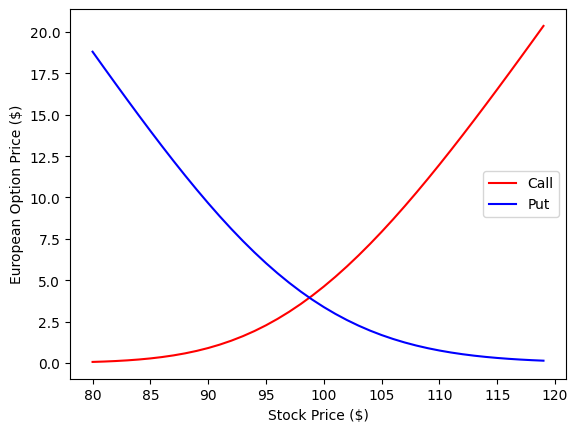

In [ ]:
S = np.arange(80, 120)
vals_call = [BS_call(x, 100, 0.05, 0.2, 3/12, 0) for x in S]
vals_put = [BS_put(x, 100, 0.05, 0.2, 3/12, 0) for x in S]
plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S,vals_put, 'b', label  = "Put")
plt.legend()
plt.ylabel("European Option Price ($)")
plt.xlabel("Stock Price ($)")
plt.show()

**(20)** American call-put prices vs stock prices

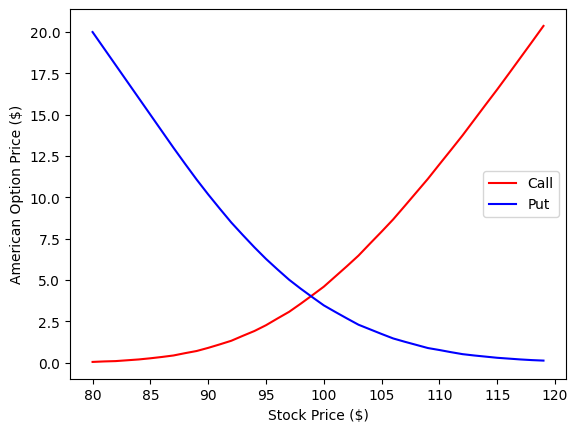

In [ ]:
vals_call=[]
vals_put=[]
S= np.arange(80,120)
for s in S:
  C20, _, _ = option_pricing_binary_tree(s, K=100, sigma=0.2, T=3/12, N=50, r=0.05, opttype='C', opt='American')
  P20, _, _ = option_pricing_binary_tree(s, K=100, sigma=0.2, T=3/12, N=50, r=0.05, opttype='P', opt='American')
  vals_call.append(round(C20[0,0],2))
  vals_put.append(round(P20[0,0],2))

plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S,vals_put, 'b', label  = "Put")
plt.legend()
plt.ylabel("American Option Price ($)")
plt.xlabel("Stock Price ($)")
plt.show()

**(21)** European and American call prices vs strike prices

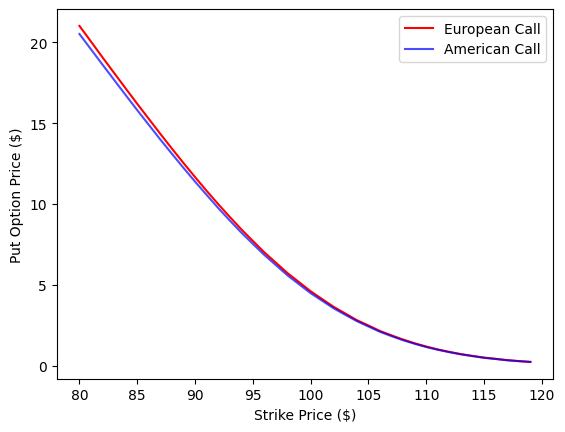

In [ ]:
vals_Acall=[]
vals_Ecall=[]
K= np.arange(80,120)
for k in K:
  model_American_call = TrinomialModel(100, 0.05, 0.2, 3/12)
  AC20 = model_American_call.price(50, k, 'call', True)
  model_Euro_call = TrinomialCallEuropean(100, 0.05, 0.2 , 3/12, k)
  EC20 = model_Euro_call.price(50)
  vals_Acall.append(round(AC20,2))
  vals_Ecall.append(round(EC20,2))

plt.plot(K,vals_Ecall, 'r', label = "European Call")
plt.plot(K,vals_Acall, 'b', label  = "American Call",alpha=0.7)
plt.legend()
plt.ylabel("Put Option Price ($)")
plt.xlabel("Strike Price ($)")
plt.show()

**(22)** European and American put prices vs strike prices

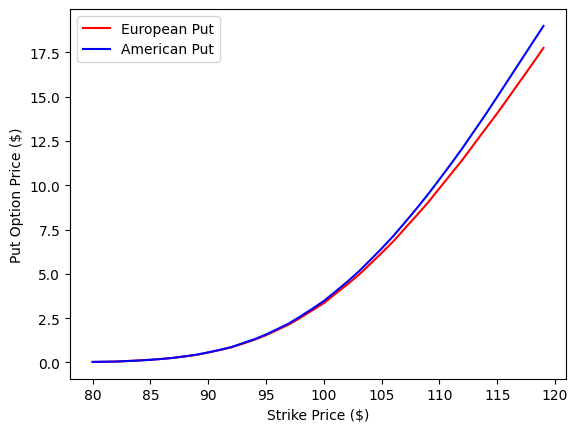

In [ ]:
vals_Aput=[]
vals_Eput=[]
K= np.arange(80,120)
for k in K:
  AP20, _, _ = option_pricing_binary_tree(100, k, sigma=0.2, T=3/12, N=50, r=0.05, opttype='P', opt='American')
  EP20, _, _, _ = put_option_price_delta(100, k, T=3/12, r=0.05, sigma=0.2, N=50)
  vals_Aput.append(round(AP20[0,0],2))
  vals_Eput.append(round(EP20,2))

plt.plot(K,vals_Eput, 'r', label = "European Put")
plt.plot(K,vals_Aput, 'b', label  = "American Put")
plt.legend()
plt.ylabel("Put Option Price ($)")
plt.xlabel("Strike Price ($)")
plt.show()

**(23)** There is put-call parity for European options at strike \$110 in the trinomial model instead of at strike \$100 in the binomial model

In [ ]:
print("Using C - P = S_0 - Ke^(-rT) for European options at")
for k in K:
  print(f"""
   Strike {k:.2f}, is there put-call parity?: {True if round(model_Euro_call.price(nb_steps) - model_Euro_put.price(nb_steps),2) == round(S_0 - k * np.exp(-r * T), 2) else False}""")

**(24)** As expected, there is no applicable put-call parity for American options

In [ ]:
def putcallpar (K):
  if round(model.price(nb_steps, K, 'call', True) - model.price(nb_steps, K, 'put', True),2) == round(S_0 - K * np.exp(-r * T), 2):
    print(f"At strike {k:.2f}, put-call parity is satisfied")
  else:
    print(f"At strike {k:.2f}, there is no put-call parity")

print("Using C-P= S_0 - Ke^(-rT) for American options")
for k in K:
  putcallpar(k)

##**Step3**


**(25)** Here we will work on real-world cases.

**Step 1: Parameters**

$S_0$ = 180

$r$ = 0.02

$\sigma$ = 0.25

$T$ = 0.5 years (6 months)

K = 182

$N$ = 3

**Step 2: We construct binomial Tree Parameters**

$\Delta t = \frac{N}{T} = 0.17 years$

$u = e^{\sigma \sqrt {\Delta t}}  \approx 1.1075$

$d = \frac {1}{u} \approx 0.9030$

$p = \frac {e^{r\Delta t} - d} {u - d} \approx 0.4908$

**Step 3: We calculate stock price at each node**

At t = 0: $S_0$ = 180

At t = 1: $S_u$ = 180 X 1.1075 = 199.35 and

$S_d$ = 180 X 0.9030 = 162.54

At t = 2:



*   $S_{uu} = 199.35 X 1.1075 \approx$ 220.78

*   $S_{ud} ,  S_{du} = 199.35 X 0.9030 \approx$ 179.97
*   $S_{dd} = 162.54 X 0.9030  \approx$ 142.85


At t = 3:



*   $S_{uuu}  = 220.78 X 1.1075 \approx$ 244.47

*   $S_{uud}, S_{udu}, S_{duu} \approx$ 199.35
*   $S_{udd}, S_{dud}, S_{ddu} \approx$ 162.54


*   $S_{ddd} \approx$ 132.57

**Step 4: We calculate put option prices at maturity**

Up-Up-Up: max(182 - 244.47, 0) = 0

Up-Up-Down, Up-Down-Up, Down-Up-Up : max(182 - 199.35, 0) = 0

Up-Down-Down, Down-Up-Down, Down-Down-Up : max(182 - 162.54, 0) = 19.46

Down-Down-Down: max(182 - 132.57, 0) = 49.43

**Step 5: Backward Induction**

At t = 2:

Up-Up: $e^{-r\Delta t} (p \cdot 0 + (1-p) \cdot 0) = 0$

Up-Down, Dwon-Up: $e^{-r\Delta t} ( p \cdot 0 + (1-p) \cdot 19.46) \approx 9.92$

Down-Down: $e^{-r \Delta t} (p \cdot 19.46 + (1-p) \cdot 49.43) \approx 33.37$

At t = 1:

Up : $e^{-rt\Delta t} ( p \cdot 0 + (1-p) \cdot 9.92) \approx 5.06$

Down : $e^{-r\Delta t} (p \cdot 9.92 + (1-p) \cdot 33.38) \approx 21.49$

At t = 0:

$e^{-r\Delta t} (p \cdot 5.06 + (1-p) \cdot 21.49) \approx 13.55$

The price of European Price option is 13.55.

Next, we will calculate the Deltas.

**Delta Hedging Process for path D-U-D (as seller of Put Option)**

At t = 0 (Initial Step)

*   Stock Price ($S_0$) = 180

*   Delta ($\Delta_0$) = -0.47
*   Action : Buy 0.42 shares to hedge


*   Cash outflow : -85.07

At t = 1, After First Move, Down

*   Stock Price($S_d$) = 162.54

*   Delta ($\Delta_1) = -0.74
*   Action : Buy an additional 0.27 shares to adjust the hedge


*   Cahs Outflow : -44.24

At t = 2 (After Second Move - Up)



*   Stock Price ($S_{du}$) = 180

*   Delta($\Delta_2$) = -0.53
*   Action : Sell 0.22 shares to adjust the hedge


*   Cash Inflow : + 38.86

At t = 3 (Final Step - Down)


*   Stock Price($S_{dud}$) = 162.54

*   Delta($\Delta_3$) = -1 (at expiration for in-the-money put option)
*   Action : Fulfill the obligation ss the put option seller. The put option is exercised.


*   Cash Outflow : -10.27

**Summary Table**

\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Time (t)} & \text{Stock Price (S)} & \text {Delta} & \text{Shares Held} & \text{Cash Flow} & \text{Cash Account} \\
\hline
0 & 180 & -0.47 & +0.47 & -85.07 & -85.07 \\
1 \text{ (D)} & 162.54 & -0.74 & +0.27 & -44.24 & -129.31 \\
2 \text{ (U)} & 180 & -0.53 & -0.22 & +38.86 & -90.45 \\
3 \text{ (D)} & 162.54 & -1 & 0 & -10.27 & -100.74 \\
\hline
\end{array}






















